# Chapter 3
## MNIST Dataset classification problems


### 1. Download the dataset


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame= False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
import numpy as np
X, y = mnist['data'], mnist['target']
some_img = X[69]
img = some_img.reshape(28,28)

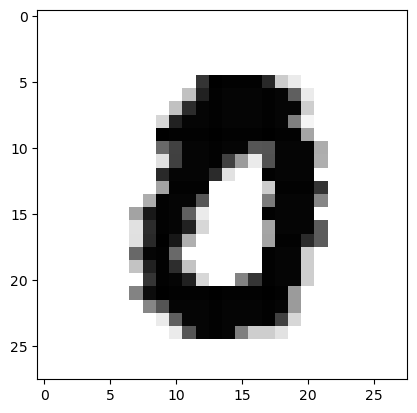

In [9]:
from matplotlib.pyplot import imshow, show
imshow(img, cmap = 'binary')
show()

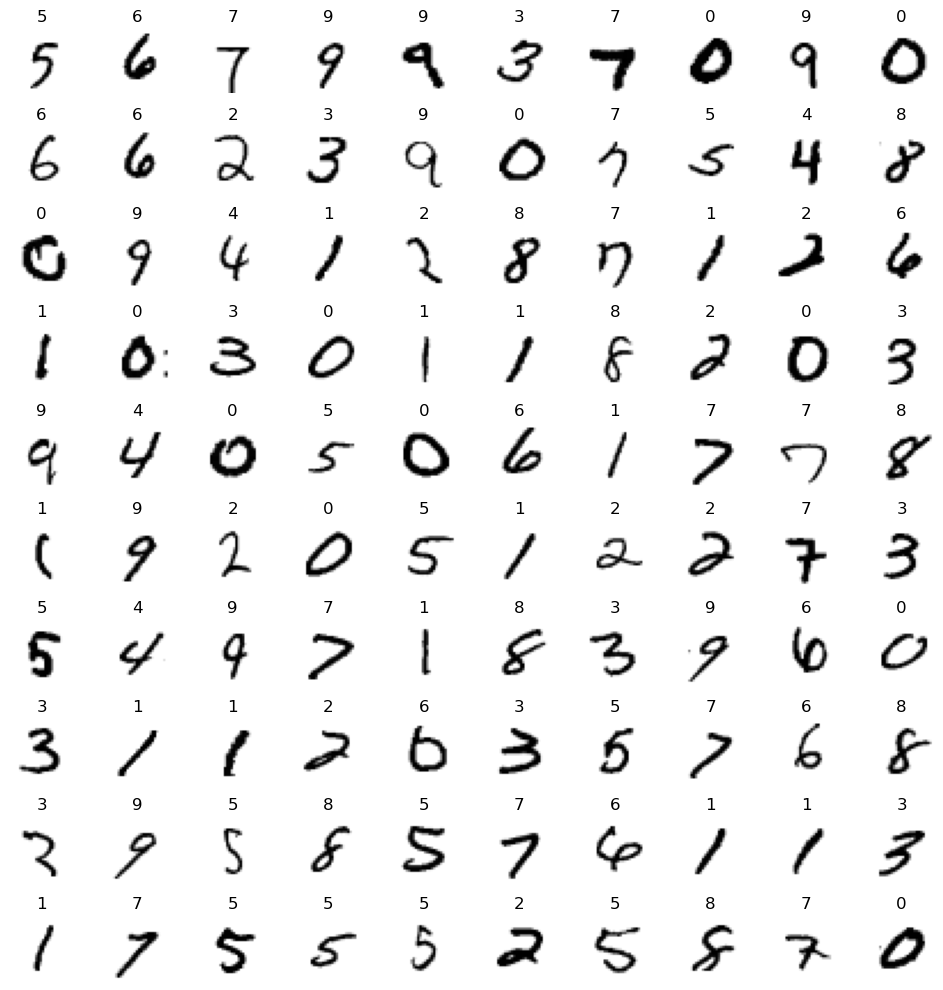

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(100):
    plt.subplot(10,10,1+i)
    temp = X[420+i].reshape(28,28)
    imshow(temp, cmap = 'binary')
    plt.axis('off')
    plt.title(label=y[420+i])
    plt.tight_layout()

* Cast label to numberic datatype

In [11]:
y = y.astype(np.uint8)

In [13]:
test_size = 0.15
data_size = X.shape[0]
size = int(test_size*data_size)

X_train, X_test, y_train, y_test = X[size:], X[:size], y[size:], y[:size]

### 2. Binary Classifier


In [13]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)
X_train_9 = X_train[y_train_9]
X_test_9 = X_test[y_test_9]

* Make sure that only the number 9 is selected

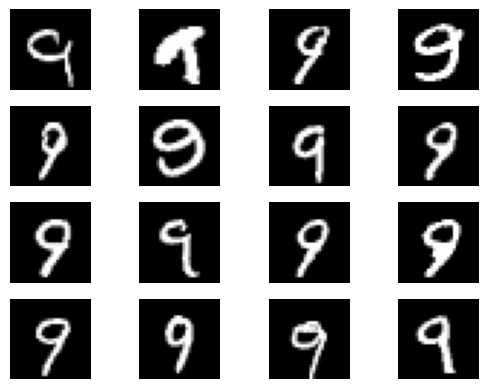

In [15]:
for i in range(16):
    plt.subplot(4,4,1+i)
    temp = X_train_9[69+i].reshape(28,28)
    imshow(temp, cmap = 'gray')
    plt.axis('off')

* check label of every character

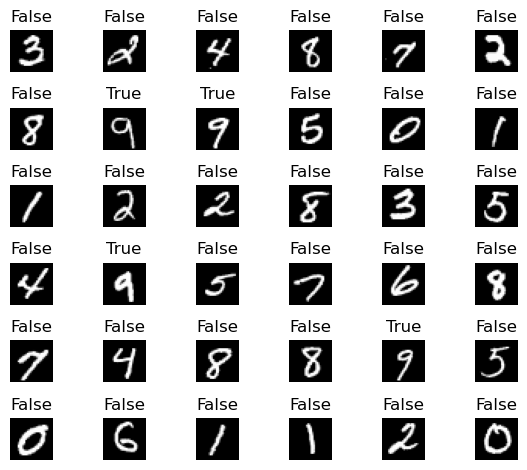

In [17]:
for i in range(36):
    plt.subplot(6,6,1+i)
    temp = X_train[69+i].reshape(28,28)
    imshow(temp, cmap = 'gray')
    plt.title(label = y_train_9[69+i])
    plt.axis('off')
    plt.tight_layout()

In [18]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

L = Label
P = Predicted
Accuracy:  0.9581904761904761


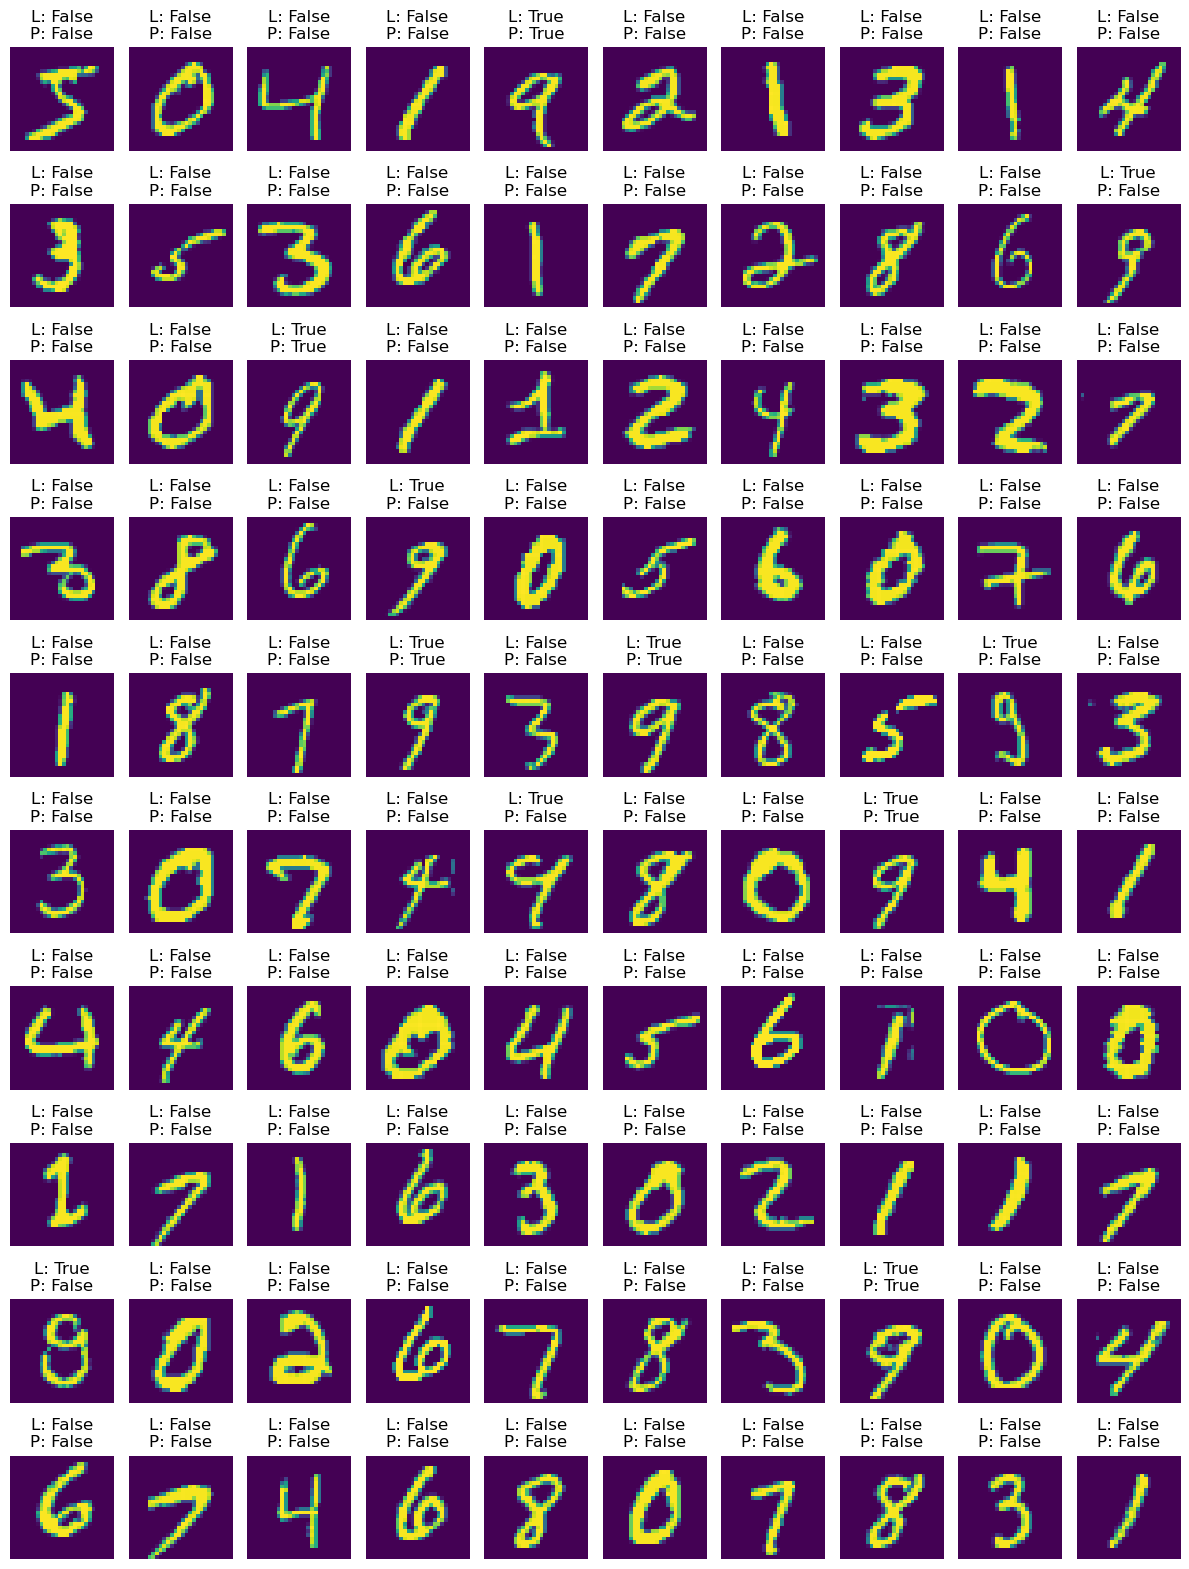

In [19]:
result = sgdc.predict(X_test)
plt.figure(figsize=(12,16))
print('L = Label\nP = Predicted')
correct_pred = sum(result==y_test_9)
print('Accuracy: ',correct_pred/len(y_test_9))
for i in range(100):
    plt.subplot(10,10,1+i)
    temp = X_test[i].reshape(28,28)
    imshow(temp)
    plt.title(label=f'L: {y_test_9[i]}\nP: {result[i]}')
    plt.axis('off')
    plt.tight_layout()

### 3. Validate the model

* Using self-coded algorithm

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skf = StratifiedKFold(n_splits=4
                      , random_state=42, shuffle=True)

for train_index, test_index in skf.split(X_train, y_train_9):
    cloned_sgdc = clone(sgdc)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    cloned_sgdc.fit(X_train_fold, y_train_fold)
    pred = cloned_sgdc.predict(X_test_fold)
    correct_pred = sum(pred==y_test_fold)
    print(correct_pred/len(y_test_fold))

0.9341176470588235
0.9511260504201681
0.9309579831932773
0.8986890756302521


* Using existing cross_val_score

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgdc, X_train, y_train_9, cv=4, scoring='accuracy', n_jobs=-1)

array([0.83213445, 0.94783193, 0.91468908, 0.95643697])

* Retrive the prediction of K-folds
* Evaluate the model using confusion matrix
> `K_folds return 'clean' prediction for each instance in the training set`
>> **_'clean'_** meaning that the prediction is made by a model that never saw the data

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

k_folds_pred = cross_val_predict(sgdc, X_train, y_train_9, cv=3, n_jobs=-1)
cm = confusion_matrix(y_train_9, k_folds_pred)

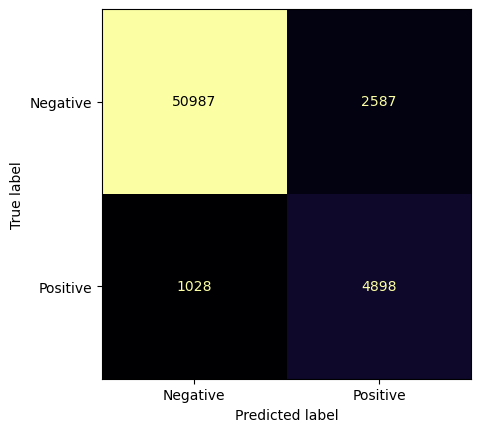

In [27]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plot.plot(colorbar=False, cmap='inferno')
show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score


ps = precision_score(y_train_9, k_folds_pred)
rs = recall_score(y_train_9, k_folds_pred)
f1s = f1_score(y_train_9, k_folds_pred)
print(f'Precision: {round(ps, 4)}\nRecall: {round(rs, 4)}\nF1: {round(f1s, 4)}')

Precision: 0.6544
Recall: 0.8265
F1: 0.7304


* Retrive the score for each instance

In [30]:
pred_scores = cross_val_predict(sgdc, X_train, y_train_9, method='decision_function', cv = 3, n_jobs=-1)

>`Suppose that we want the model have 90% precision`

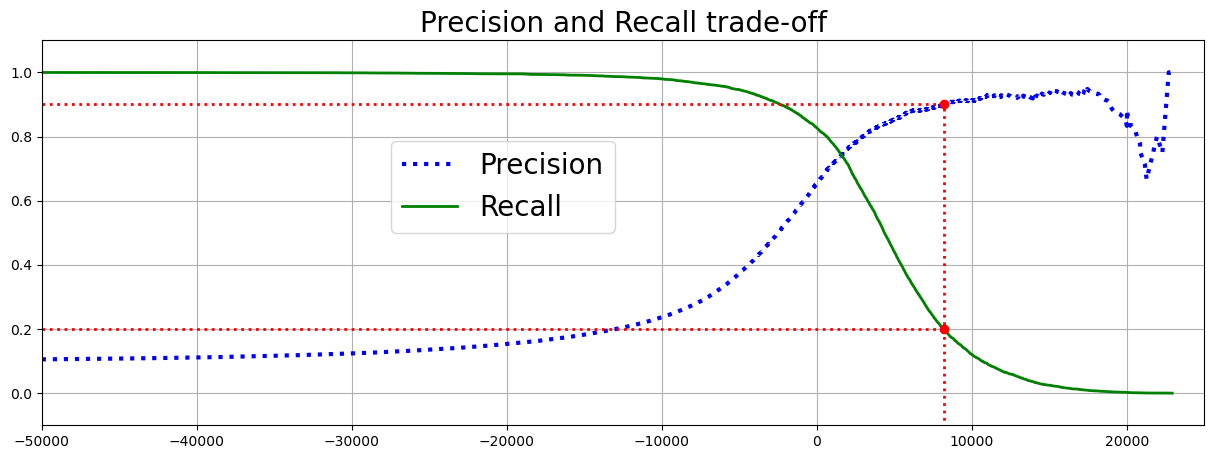

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, pred_scores)



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(15,5))
plt.plot(thresholds, precisions[:-1], 'b:', label = 'Precision', linewidth = 3)
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall', linewidth = 2)
plt.grid(visible=True)
plt.legend(loc=(0.3,0.5), fontsize = 20)
plt.title(label = 'Precision and Recall trade-off', fontsize = 20)
plt.axis([-50000,25000,-0.1, 1.1])

plt.plot([threshold_90_precision, threshold_90_precision], [-0.2, 0.9], "r:", linewidth =2)
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:", linewidth =2)
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:", linewidth =2)
plt.plot([threshold_90_precision], [0.9], "ro", linewidth =2)                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro", linewidth =2)


show()

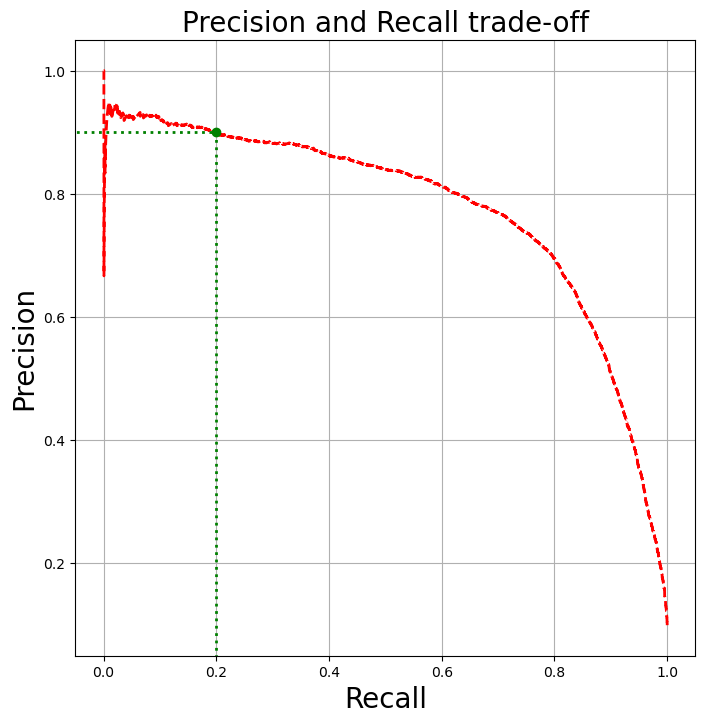

In [33]:
plt.figure(figsize=(8,8))
plt.plot(recalls[:-1], precisions[:-1], 'r--', linewidth = 2)
plt.grid(visible=True)
plt.xlabel(xlabel='Recall',fontsize =20)
plt.ylabel(ylabel='Precision',fontsize =20)
plt.title(label = 'Precision and Recall trade-off', fontsize = 20)
plt.axis([-0.05, 1.05,0.05, 1.05])

plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "g:", linewidth = 2)
plt.plot([-0.1, recall_90_precision], [0.9, 0.9], "g:", linewidth = 2)
plt.plot([recall_90_precision], [0.9], "go", linewidth = 2)
show()

In [34]:
precision_90_pred = (pred_scores>=threshold_90_precision)


ps = precision_score(y_train_9,precision_90_pred)
rs = recall_score(y_train_9,precision_90_pred)
f1s = f1_score(y_train_9,precision_90_pred)
print(f'Precision: {round(ps, 4)}\nRecall: {round(rs, 4)}\nF1: {round(f1s, 4)}')

Precision: 0.9001
Recall: 0.1991
F1: 0.3261


>`Diagonal Line represent pure random guess, so a good classifier stay as far away from that line as possible`
>>`To be able to catch more true positive, it tend to catch more false positive (fpr - false positive rate)`

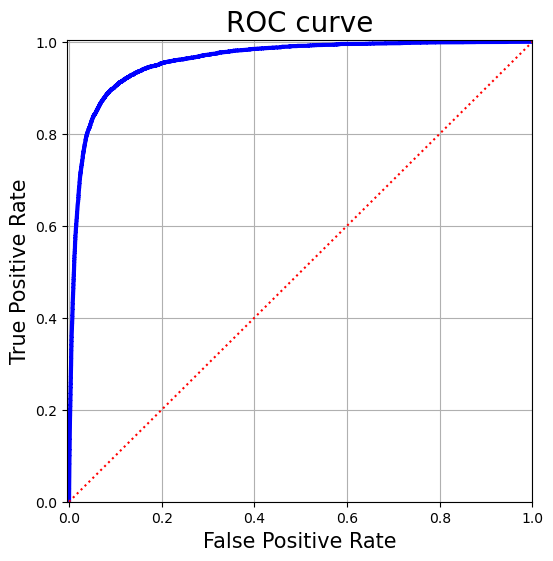

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, pred_scores)

plt.figure(figsize=(6,6))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'b-', linewidth = 3, label = label)
    plt.xlabel(xlabel='False Positive Rate', fontsize=15)
    plt.ylabel(ylabel='True Positive Rate',fontsize=15)
    plt.title(label='ROC curve', fontsize = 20)
    plt.axis([-0.0035,1,0,1.0045])
    plt.plot([0,1], [0,1], 'r:')
    plt.grid()
    
plot_roc_curve(fpr, tpr)
show()

In [37]:
from sklearn.metrics import roc_auc_score

print('The area under the curve :')
roc_auc_score(y_train_9, y_score= pred_scores)

The area under the curve :


0.9605335870416637

>`We usually prefer the Precision/Recall curve whenever the possitive class is rare or we care more about the false positives than the false negatives`

In [39]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 37)
forest_pred_proba = cross_val_predict(
    RFC,
    X_train,
    y_train_9,
    cv=3,
    method='predict_proba',
    n_jobs=-1
)

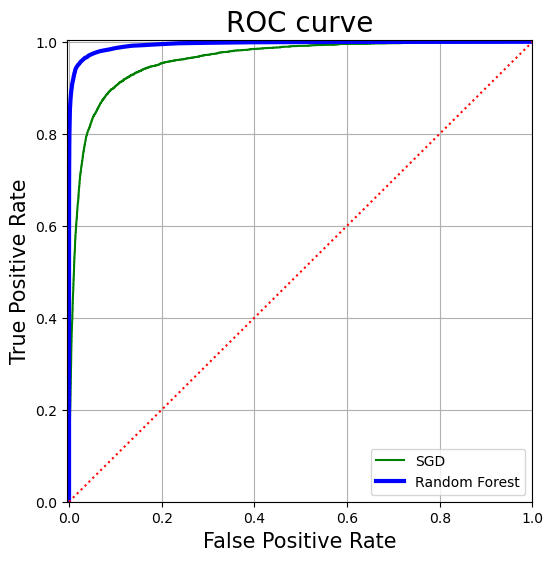

In [40]:
forest_pred_score = forest_pred_proba[:,1]
forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_train_9, forest_pred_score)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'g-', label = 'SGD')
plot_roc_curve(forest_fpr,forest_tpr, 'Random Forest')
plt.legend(loc='lower right')
show()

In [41]:
forest_pred = (forest_pred_score >= 0.5)

forest_ps = precision_score(y_train_9, forest_pred)
forest_rs = recall_score(y_train_9, forest_pred)
forest_f1s = f1_score(y_train_9, forest_pred)

print(f'Precision: {round(forest_ps, 4)}\nRecall: {round(forest_rs, 4)}\nF1: {round(forest_f1s, 4)}')
temp = roc_auc_score(y_train_9, y_score= forest_pred_score)
print(f'The area under the curve : {round(temp, 4)}')


Precision: 0.9817
Recall: 0.8441
F1: 0.9077
The area under the curve : 0.9946


### 4. Multiclass Classification

* `SGD classifiers, Random Forest, and Naive Bayes are natively in capable of handling 
multiple classes`

* `Some other such as Logistic Regression or Support Vector Machine are strictly binary 
classifier so we need to use one-versus-all strategy`

In [76]:
from sklearn.svm import SVC

svmc = SVC()
svmc.fit(X_train, y_train)


ValueError: Found array with dim 3. SVC expected <= 2.

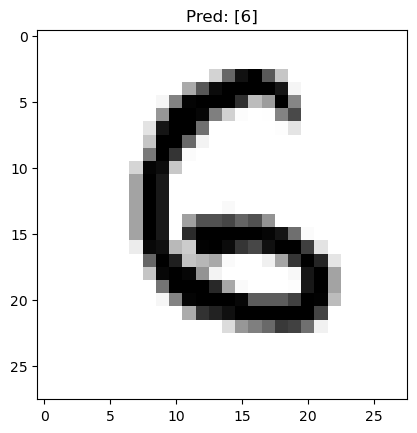

In [88]:
some_img = X_train[100]
img = some_img.reshape(28,28)
imshow(img, cmap = 'binary')
plt.title(label = f'Pred: {svmc.predict([some_img])}')
show()

* Sklearn SVC using one-versus-one (creating 45 classifiers for each pair)

In [161]:
some_img_score = svmc.decision_function([some_img])
svmc.predict([some_img])

for i in range(len(some_img_score[0])):
    print(f'Class {i} score: {round(some_img_score[0,i], 4)}')
print('Predicted class:',np.argmax(some_img_score))


Class 0 score: 1.7191
Class 1 score: 0.7065
Class 2 score: 7.2989
Class 3 score: 4.7358
Class 4 score: 3.7952
Class 5 score: 8.2922
Class 6 score: 9.3111
Class 7 score: 0.6939
Class 8 score: 6.2875
Class 9 score: 1.7102
Predicted class: 6


>`When a classifiers is trained, it stores the list of target classes in its classes_ attribute, ordered by value`

In [110]:
print('Classes: ',svmc.classes_)

Classes:  [0 1 2 3 4 5 6 7 8 9]


* Create One-Versus-All based on SVM

In [131]:
# from sklearn.multiclass import OneVsRestClassifier

# ova_svmc = OneVsRestClassifier(SVC())
# ova_svmc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [137]:
# import pickle
# file_name = 'OVA_SVMC_model.sav'
# pickle.dump(ova_svmc, open(file_name, 'wb'))

* This model took a lot of time to train so I save it for later use

In [154]:
# load the model from disk
import pickle
loaded_ova_svmc = pickle.load(open(file_name, 'rb'))
loaded_ova_svmc.predict([some_img])

array([6], dtype=uint8)

* There are only 10 classifiers in One-Versus-All stratergy

In [156]:
len(loaded_ova_svmc.estimators_)

10

* `Training a SGD classifier is much more easier for this task`

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train)

SGDClassifier(random_state=42)

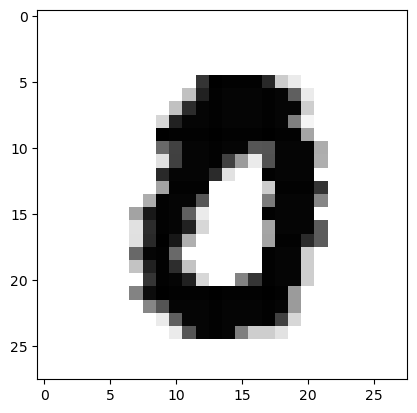

Class 0 score: 17058.9639
Class 1 score: -43272.8785
Class 2 score: -16946.971
Class 3 score: -4890.4923
Class 4 score: -32164.6308
Class 5 score: -7377.8432
Class 6 score: -25818.7128
Class 7 score: -16985.9263
Class 8 score: -3389.0624
Class 9 score: -6162.2285
Predicted class: 0


In [16]:
some_img = X_test[69]
img = some_img.reshape(28,28)
imshow(img, cmap = 'binary')
show()
some_img_score = sgdc.decision_function([some_img])
for i in range(len(some_img_score[0])):
    print(f'Class {i} score: {round(some_img_score[0,i], 4)}')
print('Predicted class:',np.argmax(some_img_score))

In [22]:
cross_val_score(sgdc, X_train, y_train, cv=3, scoring='accuracy', n_jobs= -1)

array([0.88161742, 0.86260273, 0.86451873])

* The model are significantly perform better than random guess (10% accuracy)
* We still want more improvement so I use StandardScaler to seek for some outperform

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgdc, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs= -1)

array([0.90102854, 0.89855292, 0.90899007])

* Now we evaluate the model with confusion matrix

In [25]:
y_train_pred = cross_val_predict(sgdc, X_train_scaled, y_train, cv=3, n_jobs= -1)

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5536,    0,   18,    7,   10,   44,   37,    6,  187,    1],
       [   0, 6389,   38,   24,    3,   39,    8,    9,  164,   19],
       [  23,   21, 5284,   92,   80,   22,   67,   41,  304,   14],
       [  26,   21,  123, 5228,    2,  198,   24,   39,  329,   70],
       [  10,   12,   52,   12, 5183,   11,   39,   23,  272,  184],
       [  32,   23,   22,  169,   45, 4478,   86,   23,  438,   88],
       [  28,   21,   49,    4,   43,   90, 5450,    4,  123,    0],
       [  17,   15,   68,   22,   46,   13,    5, 5601,  132,  253],
       [  18,   57,   46,   94,    5,  137,   26,    9, 5391,   58],
       [  20,   21,   24,   62,  146,   35,    1,  170,  267, 5180]],
      dtype=int64)

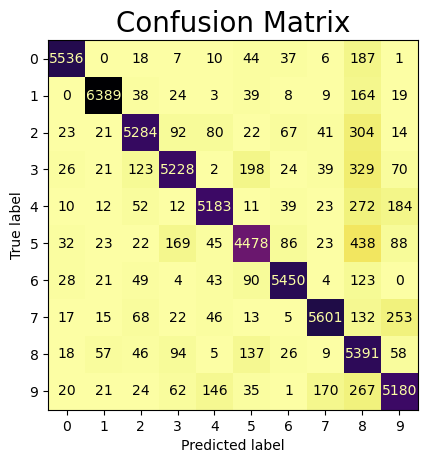

In [33]:
plot = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
plot.plot(colorbar=False, cmap='inferno_r')
plt.title(label = "Confusion Matrix", size = 20)
show()

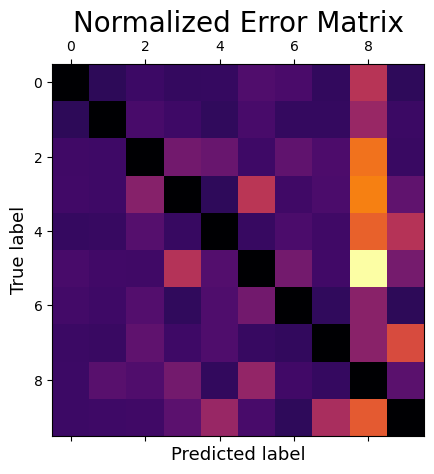

In [34]:
normalized_conf_mx = conf_mx.copy()
number_counts = normalized_conf_mx.sum(axis = 1, keepdims=True)
normalized_conf_mx = normalized_conf_mx/number_counts
np.fill_diagonal(normalized_conf_mx, -0.015)


plt.matshow(normalized_conf_mx, cmap='inferno')
plt.title(label = "Normalized Error Matrix", size = 20)
plt.xlabel(xlabel = 'Predicted label', size=13)
plt.ylabel(ylabel = 'True label', size=13)
show()

In [40]:
class_a, class_b = 3, 5
X_aa = X_train[(y_train == class_a) & (y_train_pred == class_a)]
X_ab = X_train[(y_train == class_a) & (y_train_pred == class_b)]
X_ba = X_train[(y_train == class_b) & (y_train_pred == class_a)]
X_bb = X_train[(y_train == class_b) & (y_train_pred == class_b)]

In [109]:
from sklearn.model_selection import train_test_split

def plot_digits(digits, n_rows = 5):
    _, plot_digits = train_test_split(digits, test_size=n_rows**2, random_state=42)
    plot_imgs = plot_digits.reshape(n_rows,n_rows,28,28)
    imgs_grid = plot_imgs.transpose(0,2,1,3).reshape(n_rows*28,n_rows*28)
    imshow(imgs_grid, cmap='binary')
    plt.axis('off')
        

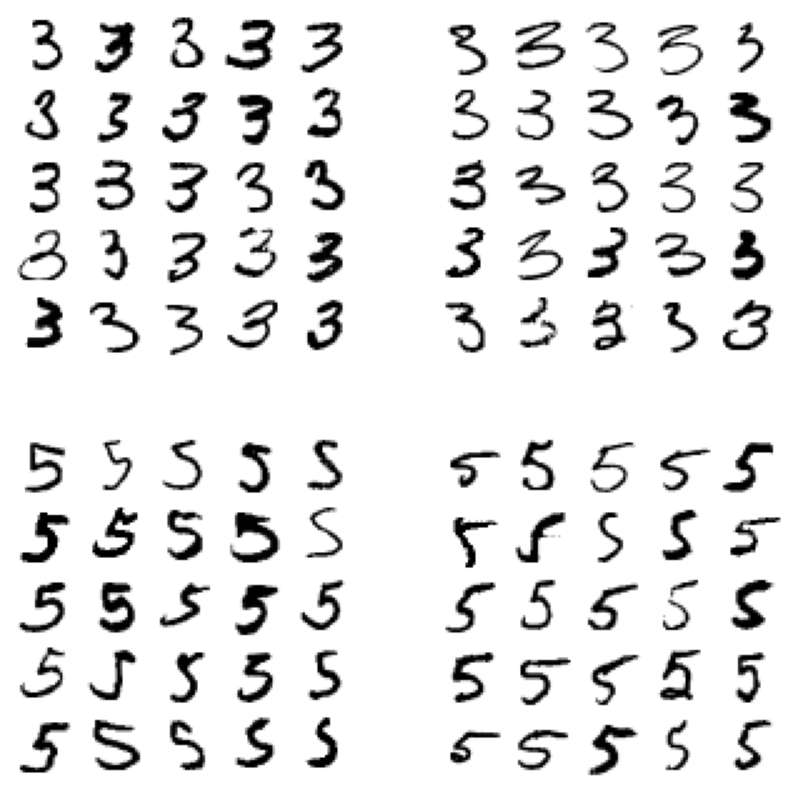

In [111]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plot_digits(X_aa)
plt.subplot(222)
plot_digits(X_ab)
plt.subplot(223)
plot_digits(X_ba)
plt.subplot(224)
plot_digits(X_bb)
show()

### 5. Multilabel Classification

>`Example is you want to recognizes several people in a single image, if two of them appear, the output might be [1,0,1]`
>
>`KNeigborsClassifier support multilabel classification, not all classifiers do`

In [116]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_train_multi_label = np.c_[y_train_large, y_train_odd]
knnc = KNeighborsClassifier()

In [118]:
knnc.fit(X_train_scaled, y_train_multi_label)

KNeighborsClassifier()

Is number larger than 7 : False
Is number odd : True


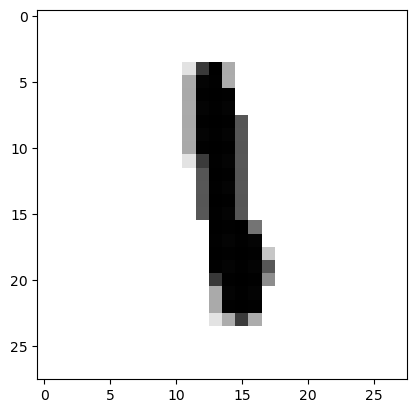

In [132]:
some_img = X_test[200]
output = knnc.predict([some_img])

print('Is number larger than 7 :', output[0,0])
print('Is number odd :', output[0,1])

img = some_img.reshape(28,28)
imshow(img, cmap = 'binary')
show()


In [137]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

multi_label_pred = cross_val_predict(knnc, X_train, y_train_multi_label, cv = 3, n_jobs=-1)

In [141]:
f1_score(y_train_multi_label, multi_label_pred, average = 'macro')

0.9753424553302499

### 6. Multioutput Classification

In [144]:
noise = np.random.randint(0, 100, (X_train.shape[0], X_train.shape[1]))
X_train_noisy = X_train + noise
noise = np.random.randint(0, 100, (X_test.shape[0], X_test.shape[1]))
X_test_noisy = X_test + noise
y_train_clear = X_train
y_test_clear = X_test

In [146]:
knnc.fit(X_train_noisy, y_train_clear)

KNeighborsClassifier()

In [152]:
index = 420
some_digit = X_test_noisy[index]
clear_img = y_test_clear[index]

def plot_img(img , label=None):
    img = img.reshape(28,28)
    imshow(img, cmap='binary')
    plt.title(label=label)
    plt.axis('off')
    
cleaned_digit = knnc.predict([some_digit])


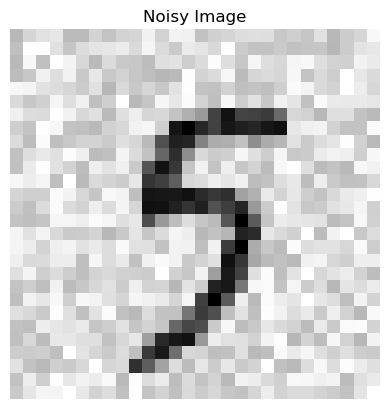

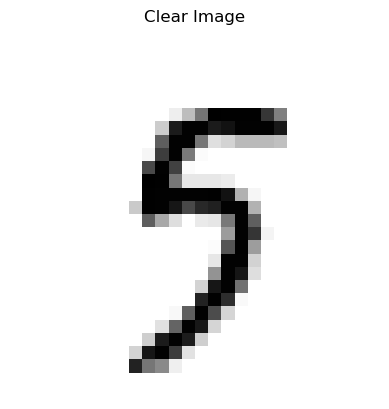

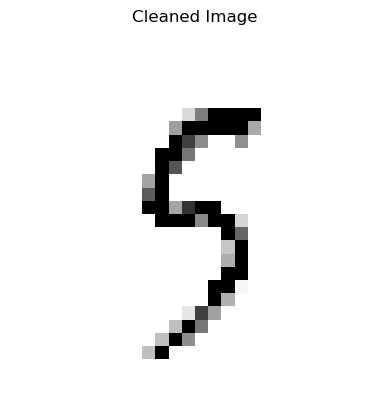

In [158]:
plot_img(some_digit, label = 'Noisy Image')
show()
plot_img(clear_img, label = 'Clear Image')
show()
plot_img(cleaned_digit, label = 'Cleaned Image')
show()

In [39]:
import numpy as np
np.r_['0,3,0', [[1,2,3],[4,5,6]], [[4,5,6],[7,8,9]]]


array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [30]:
a=np.r_[ [[1,2,3]], [[4,5,6]]]
a

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
np.random.rand(1,2,3)

array([[[0.24621063, 0.10106915, 0.59939259],
        [0.64320442, 0.36879251, 0.37682023]]])